# Practica 3


In [85]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import seaborn as sns
from scipy.integrate import quad

In [86]:
plt.rcParams.update(
    {
        "grid.color": "gray",
        "grid.linestyle": "--",
        "grid.alpha": 0.7,
        "axes.facecolor": "whitesmoke",
        "axes.labelsize": 12,
        "axes.labelweight": "bold",
        "axes.labelcolor": "navy",
        "axes.titlesize": 14,
        "axes.titleweight": "bold",
        "axes.titlecolor": "navy",
        "xtick.color": "black",
        "ytick.color": "black",
        "legend.fontsize": 10,
        "legend.frameon": False,
        "figure.autolayout": True,
    }
)

## 1. La estructura de la funcion de costo epistemica


$$ P(\text{Hipotesis, Datos }= \{d_1,d_2, ...\}) = P(\text{Hipotesis}) P(d_1|\text{Hipotesis}) P(d_2|d_1\text{Hipotesis}) ... $$


- Variables del problema de apuestas.

Recompensas:
$$ Q_c = 3, Q_s= 1,2$$

Proporcion de las apuestas:
$$ B_c = b \text{ y } B_s = 1-b$$

Recursos iniciales: $w_0$

Recursos en la ronda i: $w_i$


### 1.1 Calcular la esperanza de los recursos en los primeros dos pasos temporales con b=0.5


In [87]:
from itertools import product


# cara = 1, sello = 0
def Wb_datos(b, datos, w0=1, Qc=3, Qs=1.2):

    for d in datos:
        if d:
            w0 = w0 * b * Qc
        else:
            w0 = w0 * (1 - b) * Qs

    return w0


def Wb_datos(b, datos, w0=1, Qc=3, Qs=1.2, steps=False):
    if not steps:

        for d in datos:
            if d:
                w0 = w0 * b * Qc
            else:
                w0 = w0 * (1 - b) * Qs

        return w0

    if steps:
        output = [w0]

        for d in datos:
            if d:
                w0 = w0 * b * Qc
            else:
                w0 = w0 * (1 - b) * Qs

            output.append(w0)
        return output


def esperanza_Wb_datos(b, steps, w0=1, Qc=3, Qs=1.2):

    # todos las combinaciones son equiprobables
    combinaciones = 2**steps
    probabilidad = 1 / combinaciones

    output = 0
    for data in product([0, 1], repeat=steps):
        output += probabilidad * Wb_datos(b, data, w0, Qc, Qs)

    return output

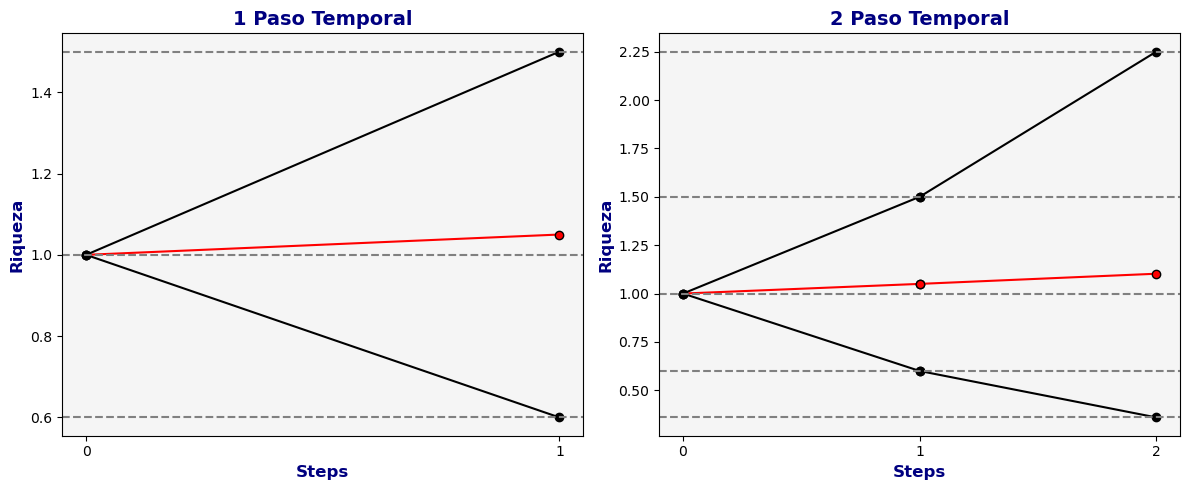

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

m0 = 1

axs[0].plot(
    [0, 1],
    [m0, esperanza_Wb_datos(0.5, 1)],
    color="red",
    marker="o",
    markeredgecolor="black",
)
axs[0].plot(
    [0, 1], [m0, Wb_datos(0.5, [1])], color="black", marker="o", markeredgecolor="black"
)
axs[0].plot(
    [0, 1], [m0, Wb_datos(0.5, [0])], color="black", marker="o", markeredgecolor="black"
)

axs[0].axhline(Wb_datos(0.5, [1]), color="gray", linestyle="--")
axs[0].axhline(1.0, color="gray", linestyle="--")
axs[0].axhline(Wb_datos(0.5, [0]), color="gray", linestyle="--")
axs[0].set_xticks([0, 1])

axs[0].set_title("1 Paso Temporal")
axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Riqueza")

# Segundo plot

axs[1].plot(
    [0, 1],
    [m0, esperanza_Wb_datos(0.5, 1)],
    color="red",
    marker="o",
    markeredgecolor="black",
)
axs[1].plot(
    [0, 1], [m0, Wb_datos(0.5, [1])], color="black", marker="o", markeredgecolor="black"
)
axs[1].plot(
    [0, 1], [m0, Wb_datos(0.5, [0])], color="black", marker="o", markeredgecolor="black"
)

axs[1].plot(
    [1, 2],
    [esperanza_Wb_datos(0.5, 1), esperanza_Wb_datos(0.5, 2)],
    color="red",
    marker="o",
    markeredgecolor="black",
)
axs[1].plot(
    [1, 2],
    [Wb_datos(0.5, [1]), Wb_datos(0.5, [1, 1])],
    color="black",
    marker="o",
    markeredgecolor="black",
)
axs[1].plot(
    [1, 2],
    [Wb_datos(0.5, [0]), Wb_datos(0.5, [0, 0])],
    color="black",
    marker="o",
    markeredgecolor="black",
)

axs[1].axhline(1.0, color="gray", linestyle="--")
axs[1].axhline(Wb_datos(0.5, [1]), color="gray", linestyle="--")
axs[1].axhline(Wb_datos(0.5, [0]), color="gray", linestyle="--")
axs[1].axhline(Wb_datos(0.5, [1, 1]), color="gray", linestyle="--")
axs[1].axhline(Wb_datos(0.5, [0, 0]), color="gray", linestyle="--")

axs[1].set_xticks([0, 1, 2])

axs[1].set_title("2 Paso Temporal")
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("Riqueza")

plt.tight_layout()

### 1.2. Simular 10000 personas, y graficar el promedio de sus recursos en los primeros 10 pasos temporales.


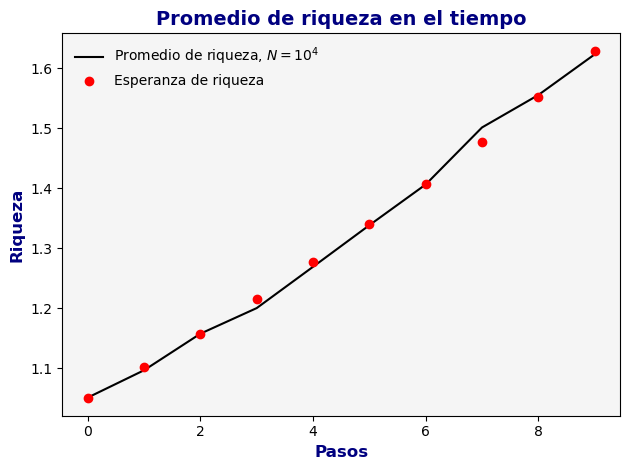

In [89]:
np.random.seed(211)

random_sample = [st.bernoulli.rvs(0.5, size=10) for _ in range(10000)]
average_over_sample_i = [
    np.mean([Wb_datos(0.5, sample[: i + 1]) for sample in random_sample])
    for i in range(10)
]

plt.plot(
    np.arange(0, 10),
    average_over_sample_i,
    color="black",
    label="Promedio de riqueza, $N=10^4$",
)
plt.plot(
    np.arange(0, 10),
    [esperanza_Wb_datos(0.5, i + 1) for i in range(10)],
    color="red",
    label="Esperanza de riqueza",
    linestyle="",
    marker="o",
)

plt.legend()
plt.xlabel("Pasos")
plt.ylabel("Riqueza")
plt.title("Promedio de riqueza en el tiempo")
plt.tight_layout()

### 1.3 Graficar como se actualizan los recursos con el tiempo con una apuesta determinada


C:\Users\Damm\AppData\Local\Temp\ipykernel_7072\594489149.py:10: RuntimeWarning: divide by zero encountered in log
  log_wi = np.log(Wb_datos(b_test, data, steps=True))


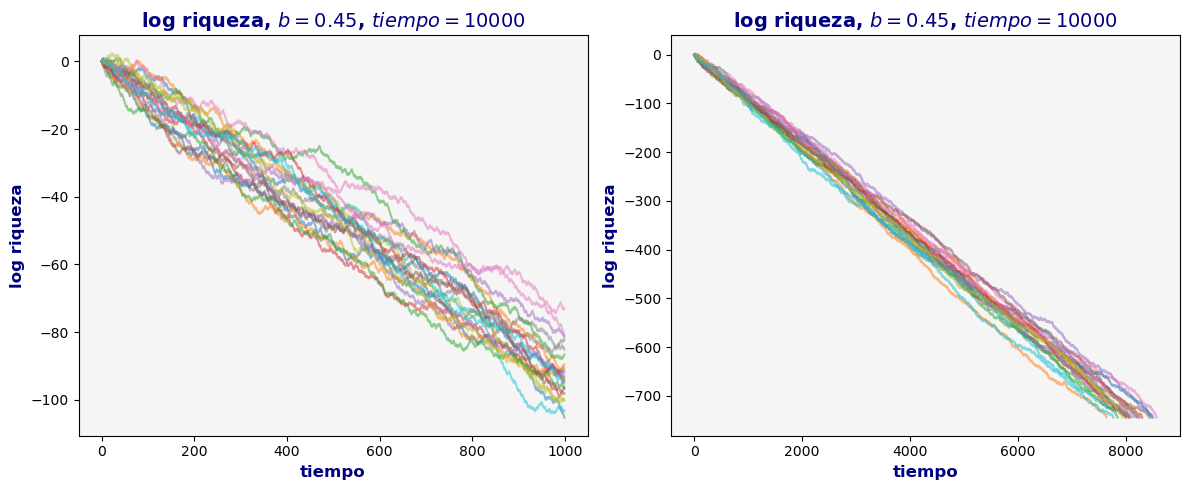

In [99]:
b_test = 0.45
steps = 10000
steps_plot1 = 1000


fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i in range(20):
    data = st.bernoulli.rvs(b_test, size=steps)
    log_wi = np.log(Wb_datos(b_test, data, steps=True))
    axs[0].plot(log_wi[0:steps_plot1], alpha=0.5)
    axs[1].plot(log_wi, alpha=0.5)

axs[0].set_title(f"log riqueza, $b={b_test}$, $tiempo = {steps}$")
axs[0].set_xlabel("tiempo")
axs[0].set_ylabel("log riqueza")
axs[1].set_title(f"log riqueza, $b={b_test}$, $tiempo = {steps}$")
axs[1].set_xlabel("tiempo")
axs[1].set_ylabel("log riqueza")

plt.tight_layout()

### 1.4 Graficar la tasa de crecimiento temporal (lımT →∞) de los recursos para cada apuesta alternativa b.


Cuando $T \rightarrow \infty$, $n_c = n_s = 0.5 T$. Es decir las frecuencias de los eventos observados converge a la probabilidad de los eventos.

Queda entonces que $w_T(b) = w_0 (bQ_c)^{0.5T}((1-b)Q_s)^{0.5T}$

y $r(b) = w_0 (bQ_c)^{0.5}((1-b)Q_s)^{0.5}$


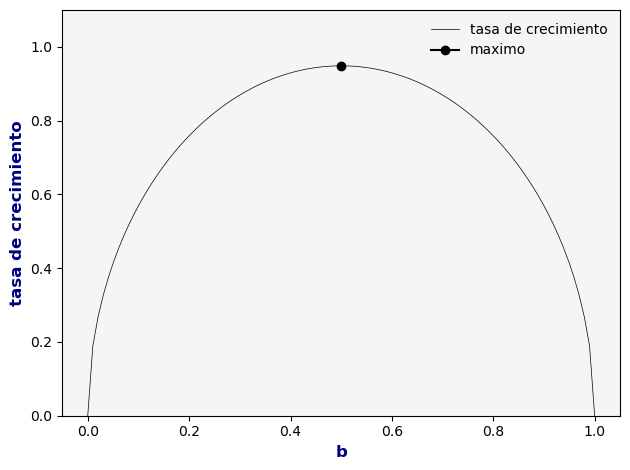

In [ ]:
r = lambda x: (3 * 1.2 * x * (1 - x)) ** 0.5
x = np.linspace(0, 1, 100)

plt.plot(x, r(x), c="black", label="tasa de crecimiento", linewidth=0.5)
plt.plot(0.5, r(0.5), marker="o", c="black", label="maximo")
plt.ylim(0, 1.1)
plt.xlabel("b")
plt.ylabel("tasa de crecimiento")
plt.legend()

### 1.5 Buscar la apuesta que maximiza los recursos si se modifica el pago que ofrece la casa de apuestas.


$w_T(b) = w_0 (bQ_c)^{0.5T}((1-b)Q_s)^{0.5T}$, cuando $T\rightarrow \infty$

Se puede observar que la expresion es proporcional a un termino $ w_t(b) \sim (\sqrt{b(1-b)})^T$ que tiene un maximo en $b=0.5$ y un minimo en $b=0$ y $b=1$. Vale la pena observar que la tasa de crecimiento depende del valor de $Q_c$ y $Q_s$, pero la apuesta optima es siempre $b=0.5$.


### 1.6 Calcular analiticamente la diferencia de desempeño de dos apuestas b y d dado unos pagos fijos $Q_s$ y $Q_c$.


De la expresion $$ \frac{w_t(b)}{w_t(d)} = (\frac{b}{d})^{n_c} (\frac{(1-b)}{(1-d)})^{n_s}$$ se puede observar que la diferencia en performance relativa a dos apuestas $b$ y $d$ no depende de los pagos $Q_c$ y $Q_s$.


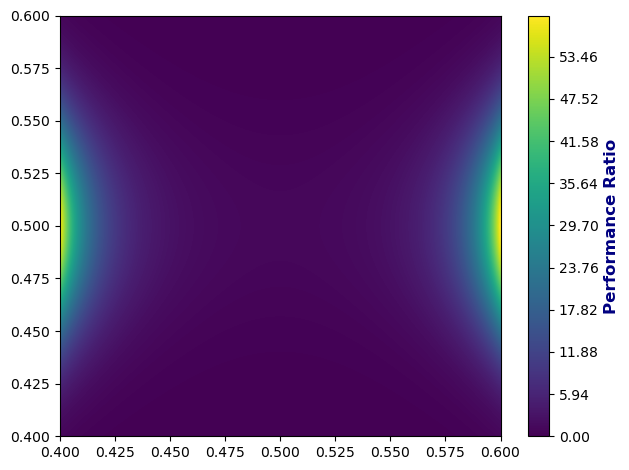

In [138]:
_range = np.linspace(0.4, 0.6, 200)
n_c = n_s = 100

matrix = np.zeros((len(_range), len(_range)))

for i in range(len(_range)):
    for j in range(len(_range)):
        matrix[i, j] = (_range[i] / _range[j]) ** n_c * ((1 - _range[i]) / (1 - _range[j])) ** n_s

plt.contourf(
    _range,
    _range,
    matrix,
    levels=1000,
    cmap="viridis",
)


plt.colorbar(label="Performance Ratio")